In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import seaborn as sns
import numpy as np
from numpy.polynomial.polynomial import polyfit

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import cluster, datasets

In [2]:
demographic = pd.read_csv("../Data_final/demographic_refined.csv")
demographic

,zipcode,county_name,city,population,population_rank,city_name,aland,median_household_income,average_household_income,per_capita_income,...,hhi_200k_or_more,race_and_ethnicity_total,population_density_sq_mi,median_age,educational_attainment_bachelors,educational_attainment_graduate,family_poverty_pct,unemployment_pct,housing_units,median_value_of_owner_occupied_units
0,90242,Los Angeles,Downey,112322,59,Downey,11788002,71233,85792,26335,...,738,42694,9384.0,34.1,0.1440,0.06500,0.07600,0.05700,12713,513900
1,90747,Los Angeles,Carson,92079,83,Carson,16629,72803,91209,28026,...,704,33215,4884.0,39.7,0.1885,0.07477,0.08100,0.06430,9331,464175
2,91501,Los Angeles,Burbank,103703,71,Burbank; Glendale,10275284,67817,94589,38247,...,965,20511,5170.0,40.5,0.2810,0.14800,0.09705,0.08100,8417,770500
3,92115,San Diego,San Diego,1409573,2,San Diego,16845692,51636,73784,25970,...,1130,64343,9896.0,28.3,0.2020,0.12396,0.11400,0.06500,23089,499100
4,92543,Riverside,Hemet,84542,100,East Hemet; Hemet,45646461,33319,45497,16435,...,160,38314,2174.0,35.2,0.0570,0.02301,0.23790,0.15000,14367,136600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,90042,Los Angeles,Los Angeles,3966936,1,Los Angeles,12036777,64267,87211,30575,...,1641,63193,13600.0,35.8,0.2130,0.11000,0.11300,0.06800,22061,627200
970,90043,Los Angeles,Los Angeles,3966936,1,Los Angeles; View Park-Windsor Hills,10705825,54729,77169,31101,...,1236,45873,11096.0,40.1,0.1600,0.10205,0.14210,0.09000,18748,556400
971,90044,Los Angeles,Los Angeles,3966936,1,Los Angeles; West Athens; Westmont,13303667,35981,51524,16278,...,474,99443,19360.0,31.6,0.0590,0.02000,0.26200,0.07104,30461,391100
972,90045,Los Angeles,Los Angeles,3966936,1,Del Aire; Los Angeles,27794039,104578,140825,56291,...,3432,40567,3780.0,35.1,0.3830,0.22500,0.04602,0.05000,17133,959400


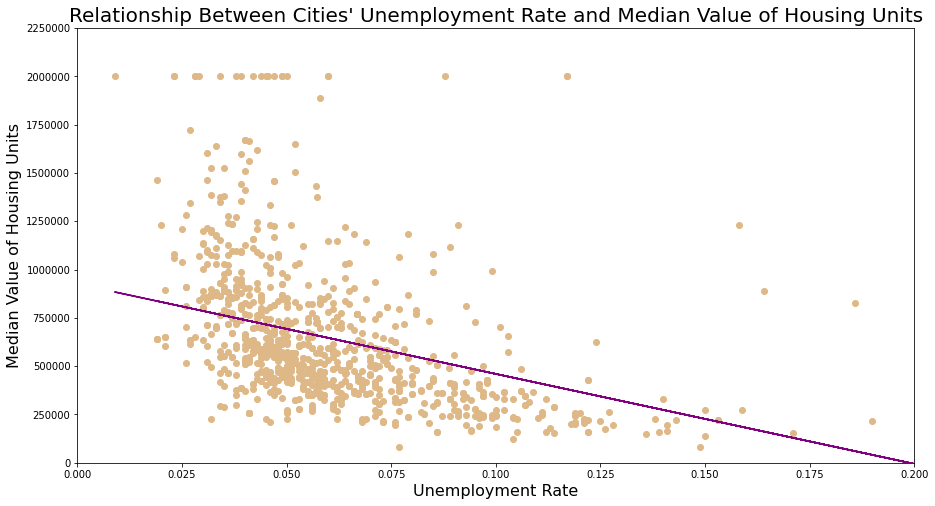

In [3]:
fig, ax = plt.subplots(figsize=(15,8))
ax. ticklabel_format(useOffset=False, style='plain')
##ttl = ax.title
ax.title.set_position([0.5, 50])

b, m = polyfit(demographic['unemployment_pct'], demographic["median_value_of_owner_occupied_units"], 1)
plt.plot(demographic['unemployment_pct'], b + m * demographic['unemployment_pct'], color = "purple")

plt.scatter(demographic['unemployment_pct'], demographic["median_value_of_owner_occupied_units"], color = "burlywood")

plt.title("Relationship Between Cities' Unemployment Rate and Median Value of Housing Units", fontsize = 20)
plt.xlabel("Unemployment Rate", fontsize = 16)
plt.ylabel("Median Value of Housing Units", fontsize = 16)
plt.xlim(0, 0.2)
plt.ylim(0, 2250000)

plt.show()

[Text(0.5, 0, 'population'),
 Text(1.5, 0, 'population_rank'),
 Text(2.5, 0, 'aland'),
 Text(3.5, 0, 'median_household_income'),
 Text(4.5, 0, 'average_household_income'),
 Text(5.5, 0, 'per_capita_income'),
 Text(6.5, 0, 'percent_of_households_with_incomes_200000_or_more'),
 Text(7.5, 0, 'householder_under_25_years'),
 Text(8.5, 0, 'householder_25_to_44_years'),
 Text(9.5, 0, 'householder_45_to_64_years'),
 Text(10.5, 0, 'householder_65_years_and_over'),
 Text(11.5, 0, 'hhi_total'),
 Text(12.5, 0, 'hhi_lt_25k'),
 Text(13.5, 0, 'hhi_25k_to_49k'),
 Text(14.5, 0, 'hhi_50k_to_749k'),
 Text(15.5, 0, 'hhi_75k_to_999k'),
 Text(16.5, 0, 'hhi_100k_to_1490k'),
 Text(17.5, 0, 'hhi_150k_to_1999k'),
 Text(18.5, 0, 'hhi_200k_or_more'),
 Text(19.5, 0, 'race_and_ethnicity_total'),
 Text(20.5, 0, 'population_density_sq_mi'),
 Text(21.5, 0, 'median_age'),
 Text(22.5, 0, 'educational_attainment_bachelors'),
 Text(23.5, 0, 'educational_attainment_graduate'),
 Text(24.5, 0, 'family_poverty_pct'),
 Text(25

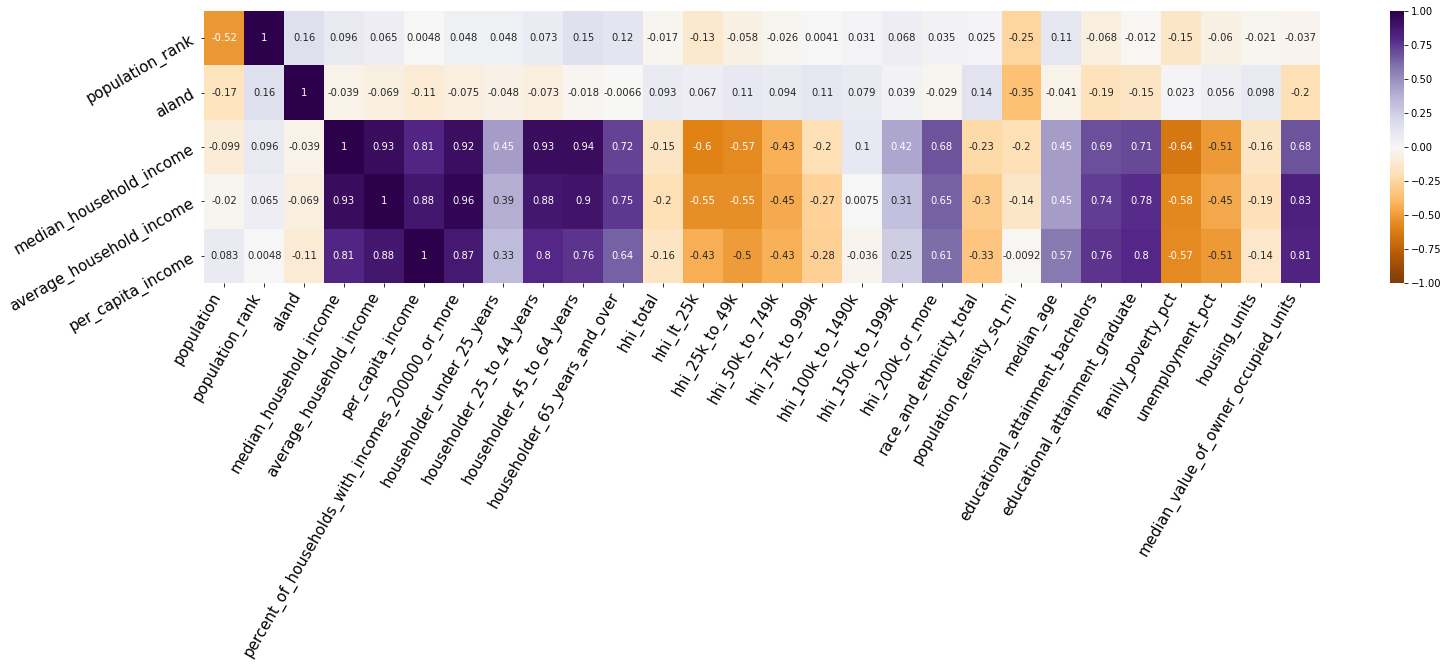

In [4]:
temp = demographic
temp = temp.drop("zipcode", axis=1)
tc = temp.corr()
fig, ax = plt.subplots(figsize=(25,5))
sns.heatmap(tc[1:6], annot = True, 
            cmap=plt.get_cmap('PuOr'), vmin = -1, vmax = 1)
ax.set_yticklabels(ax.get_yticklabels(), rotation="30", fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation="60", horizontalalignment='right', fontsize = 15)

In [5]:
housing = pd.read_csv("../Data_final/zip_housing_cleaned.csv")
housing

,Unnamed: 0,property_id,prop_type,year_built,is_new_construction,beds,baths,garage,price,lot_size,building_size,line,neighborhoods,city,county,state_code,postal_code,baths_full,baths_half
0,0,O2889402305,multi_family,1906,f,3,2.0,3,570000,7057,1756,6375 Converse Ave,"['Florence-Graham', 'South LA']",Los Angeles,Los Angeles,CA,90001,2,0
1,1,O1305476579,single_family,1913,f,3,1.5,1,470000,5721,1030,7916 Alix Ave,"['Florence-Graham', 'South LA']",Los Angeles,Los Angeles,CA,90001,1,1
2,2,O9299703972,multi_family,1938,f,3,2.0,2,830000,5495,2503,1222 E 78th St,['South LA'],Los Angeles,Los Angeles,CA,90001,2,0
3,3,O2866856410,single_family,1905,f,4,2.0,2,400000,5387,1248,1659 E 70th St,['South LA'],Los Angeles,Los Angeles,CA,90001,2,0
4,4,O2823776981,condo,1912,f,5,2.0,2,659000,5667,1897,1364 E 58th Pl,['South LA'],Los Angeles,Los Angeles,CA,90001,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98073,98073,O1392454616,single_family,2006,f,3,2.5,2,275000,2614,1430,2365 LA Villa Way,"['Northeast Redding', 'The Villages at Shasta ...",Redding,Shasta,CA,96003,2,1
98074,98074,O2959173930,NaN,1972,f,3,2.0,2,899000,1146783,3550,13450 Mitchellinda Dr,NaN,Redding,Shasta,CA,96003,2,0
98075,98075,O1290952370,single_family,1977,f,3,2.0,5,483500,89734,2552,19287 Roxie Ln,NaN,Redding,Shasta,CA,96003,2,0
98076,98076,O1523744489,single_family,1984,f,4,3.0,4,345000,87120,2040,13143 Tamera Way,NaN,Redding,Shasta,CA,96003,3,0


In [6]:
housing_groupby_city = housing.groupby("city", as_index = False).median()
housing_groupby_city = housing_groupby_city.sort_values(by='price', ascending=False)
housing_groupby_city

housing_groupby_city_top_10 = housing_groupby_city.head(10)
top_10_list = housing_groupby_city_top_10['city'].tolist()
housing_groupby_city_top_10

,city,Unnamed: 0,year_built,beds,baths,garage,price,lot_size,building_size,postal_code,baths_full,baths_half
85,Palo Alto,65859.0,1956.0,3.0,2.0,2.0,2744000.0,6900.0,1762.0,94303.0,2.0,0.0
77,Newport Beach,43242.5,1973.0,3.0,2.5,2.0,2245000.0,6375.0,2244.0,92661.0,2.0,0.0
74,Mountain View,60729.0,1978.0,3.0,2.5,2.0,1700000.0,5245.0,1526.0,94041.0,2.0,0.0
97,Redwood City,61174.0,1962.0,3.0,2.0,2.0,1650000.0,6782.0,1620.0,94062.0,2.0,0.0
115,Santa Barbara,51861.0,1971.0,3.0,2.0,2.0,1567500.0,9583.0,0.0,93105.0,2.0,0.0
126,Sunnyvale,61937.5,1972.0,3.0,2.0,2.0,1407500.0,6240.5,1529.0,94087.0,2.0,0.0
120,Santa Monica,8787.0,1969.0,2.0,2.0,2.0,1395000.0,8008.0,1472.0,90403.0,2.0,0.0
36,Encinitas,23048.5,1983.0,3.0,2.5,2.0,1380500.0,16446.0,1828.5,92024.0,2.0,0.0
108,San Francisco,63988.0,1942.0,3.0,2.0,2.0,1380000.0,5001.0,1385.0,94116.0,2.0,0.0
112,San Mateo,66270.0,1958.0,3.0,2.0,2.0,1380000.0,7548.0,1440.0,94402.0,2.0,0.0


(0.0, 6000000.0)

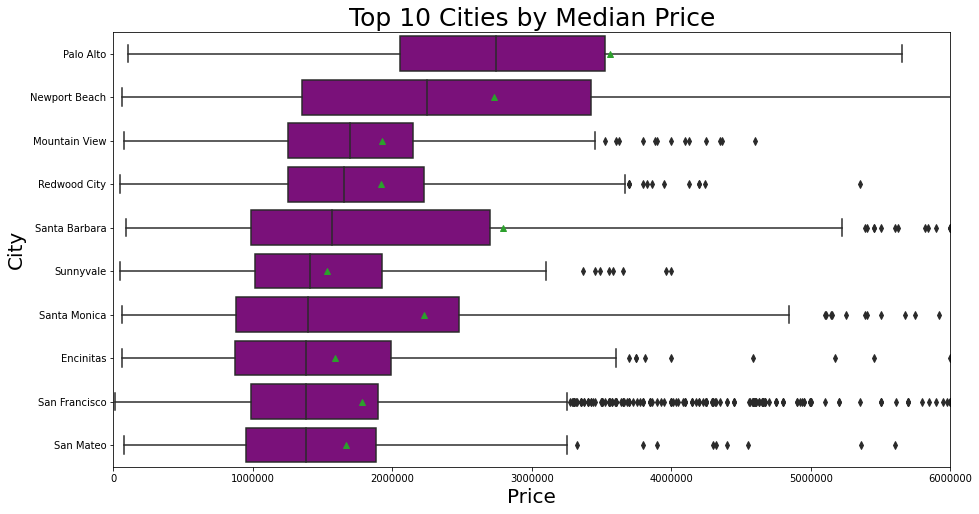

In [13]:
grouped_price = housing[["city", "price"]]
grouped_price_top_10 = grouped_price[grouped_price["city"].isin(top_10_list)]
##grouped_price_top_10.boxplot()
##grouped_price_top_10 = grouped_price_top_10.groupby("city", as_index = False)
##grouped_price_top_10.boxplot(subplots = False, rot=45, figsize=(8,10))
##plt.ylim(0, 5000000)
fig , ax1 = plt.subplots(figsize=(15,8))
ax1.ticklabel_format(useOffset=False, style='plain')

median_price_boxplot = sns.boxplot(y='city',x='price',data=grouped_price_top_10,orient="h", color = "darkmagenta", showmeans=True, 
           order = ['Palo Alto', 'Newport Beach', 'Mountain View', 'Redwood City', 'Santa Barbara', 'Sunnyvale',
                   'Santa Monica', 'Encinitas', 'San Francisco', 'San Mateo'])
plt.title("Top 10 Cities by Median Price", fontsize = 25)
plt.xlabel("Price", fontsize = 20)
plt.ylabel("City", fontsize = 20)
plt.xlim(0, 6000000)